In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
data = pd.read_csv('file:/Users/marinhog/Documents/Unicamp/MC886/Dados/House Prices 2.csv')

In [79]:
data.head()

,House,Size,Color,Price
0,1,100,Red,4000
1,2,100,Blue,5000
2,3,150,Yellow,7000
3,4,200,Red,8600
4,5,250,Yellow,10000


In [80]:
data.corr()

,House,Size,Price
House,1.000000,0.995819,0.991764
Size,0.995819,1.000000,0.995797
Price,0.991764,0.995797,1.000000


Text(0, 0.5, 'Size')

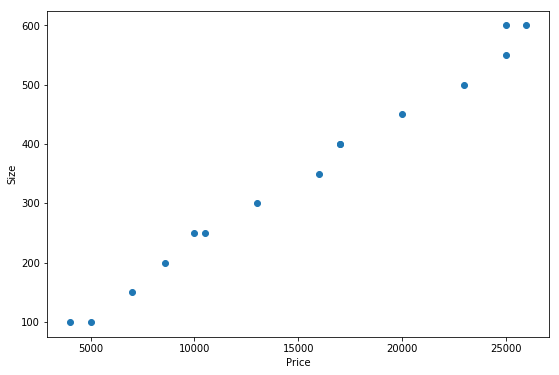

In [81]:
figure = plt.figure(figsize=(9,6))
plt.scatter(data['Price'], data['Size'])
plt.xlabel('Price')
plt.ylabel('Size')

In [82]:
size = data['Size'].values
size_normal = (size - size.mean())/size.max()

color = data['Color'].values
red = []
blue = []
yellow = []
for i in range(len(color)):
    if(color[i] == 'Red'):
        red.append(1)
        blue.append(0)
        yellow.append(0)
    elif(color[i] == 'Blue'):
        red.append(0)
        blue.append(1)
        yellow.append(0)
    else:
        red.append(0)
        blue.append(0)
        yellow.append(1)

old_y = data['Price'].values
y = (old_y - old_y.mean())/old_y.max()

learning_rate = 0.01
iterations = 1000000
m = len(y)

x0 = np.ones(m)
X = np.c_[x0, size_normal, red, blue, yellow]

In [83]:
theta = np.zeros([1, len(X[0])])
theta = theta[0]
theta

array([0., 0., 0., 0., 0.])

In [84]:
for i in range(iterations):
    theta = theta - (learning_rate/m) * (X.T).dot(X.dot(theta) - y)

In [85]:
theta

array([ 1.09349140e-03,  1.01008761e+00, -5.37017882e-03,  8.98935022e-04,
        5.56473519e-03])

In [86]:
def predict(new):
    adjusted = []
    adjusted.append(0)
    adjusted.append((new[0] - size.mean())/size.max())
    if(new[1] == 'Red'):
        adjusted.append(1)
        adjusted.append(0)
        adjusted.append(0)
    elif(new[1] == 'Blue'):
        adjusted.append(0)
        adjusted.append(1)
        adjusted.append(0)
    else:
        adjusted.append(0)
        adjusted.append(0)
        adjusted.append(1)
    
    result = theta[0]
    for i in range (1, len(theta)):
        result = result + theta[i]*adjusted[i]
    
    return ((result)*old_y.max() + old_y.mean())

In [92]:
print(predict([600, 'Yellow']))

26401.63119737892
